In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from scipy.signal import medfilt, find_peaks, find_peaks_cwt, lfilter, savgol_filter
import numpy as np
import tifffile as ti
from skimage.filters.thresholding import threshold_li, threshold_yen
import cv2
from skimage.util import img_as_uint
from scipy import ndimage

matplotlib.rcParams.update(matplotlib.rcParams['figure.figsize'] = [15, 12]{'font.size': 15})
matplotlib.rcParams['pdf.fonttype'] = 42
import glob
import scipy.io
from scipy.interpolate import interp1d

In [2]:
csv_path = "./nuclei_GFP_intensity.csv"
path = "/mnt/external.data/TowbinLab/ngerber/20200317_wBT280_wBT281_LIPSI_daf16_GFP_20C/analysis/report/"
file = glob.glob(path + "*" + "ch1_WBT281_focused_threshold_seg_str_molts_cor.mat")[0]
mat = scipy.io.loadmat(file)

peaks_csv_path = "./peaks_old.csv"

moults = mat['ecdys'][:, 1:]

# interval_50_to_150 = []
interval_150_to_300 = []

for i, moult in enumerate(moults):
    if not np.isnan(moult[2]):
        moult2_halfway = int((moult[1] + moult[0])//2)
        moult3_halfway = int((moult[2] + moult[1])//2)

        # print(moult3_halfway - moult2_halfway)
        interval_150_to_300.append([i, moult2_halfway, moult3_halfway])


intensities_over_intervals_moult_peak =[]
intensities_over_intervals_no_moult_peak = []

index_list = [10, 1]
for idx in index_list:
    print(f'index, {idx}')
    interval_150_to_300 = sorted(interval_150_to_300, key = lambda x:int(x[0]))
    interval = interval_150_to_300[idx]
    point_int = (interval[0])
    point = str(point_int)
    while len(point) < 4:
        point = "0" + point
    point = "Point" + point

    dataframe = pd.read_csv(csv_path)
    dataframe = dataframe[dataframe['Point'] == point]

    dataframe.drop('Point', inplace=True, axis=1)

    peaks_dataframe = pd.read_csv(peaks_csv_path)
    
    peaks_dataframe = peaks_dataframe[peaks_dataframe['Point'] == point_int]
    peaks_dataframe.drop('Point', inplace=True, axis=1)

    peaks = peaks_dataframe.to_numpy().squeeze()
    peaks = peaks[~np.isnan(peaks)]

    mean_GFP_intensity = dataframe.to_numpy().squeeze()
    index_range = np.array(list(range(np.shape(mean_GFP_intensity)[0])))

    # median_mean_GFP_intensity = medfilt(mean_GFP_intensity, 1)
    # median_mean_GFP_intensity = savgol_filter(mean_GFP_intensity, 9, 6)
    median_mean_GFP_intensity = mean_GFP_intensity

    interval_range = np.arange(interval[1], interval[2])
    intensity_over_interval = median_mean_GFP_intensity[interval[1]: interval[2]]
    peaks = peaks[np.where(peaks > interval[1])]
    peaks = peaks[np.where(peaks < interval[2])]

    interval_array = np.arange(interval[1], interval[2])
    
    peaks_over_interval = (np.where(np.in1d(interval_array, peaks))[0])

    moult_2_index = interval_array.shape[0]//2

    print(moult_2_index)

    print(point)
    if (np.any((peaks_over_interval > moult_2_index - 5) & (peaks_over_interval < moult_2_index + 5))):
        interp_func = interp1d(interval_range, intensity_over_interval)
        new_range = np.linspace(interval[1], interval[2]-1, 100)
        interpolated_intensity_over_interval = interp_func(new_range)

        plt.plot(intensity_over_interval[moult_2_index-36:moult_2_index+36], linewidth=4, color='firebrick')
        plt.vlines(36, 450, 1300, linewidth = 4, color="black", linestyles="dashed")
        plt.xlabel('Development progression')
        plt.ylabel('Mean GFP intensity in the nuclei')

        intensities_over_intervals_moult_peak.append(interpolated_intensity_over_interval)
    else:
        interp_func = interp1d(interval_range, intensity_over_interval)
        new_range = np.linspace(interval[1], interval[2]-1, 100)
        interpolated_intensity_over_interval = interp_func(new_range)

        plt.plot(intensity_over_interval[moult_2_index-36:moult_2_index+36], linewidth=4, color='royalblue')
        intensities_over_intervals_no_moult_peak.append(interpolated_intensity_over_interval)

plt.savefig(f'./nuclear_GFP_graph_for_grant.pdf')
plt.show()

index, 10


FileNotFoundError: [Errno 2] No such file or directory: './peaks_old.csv'

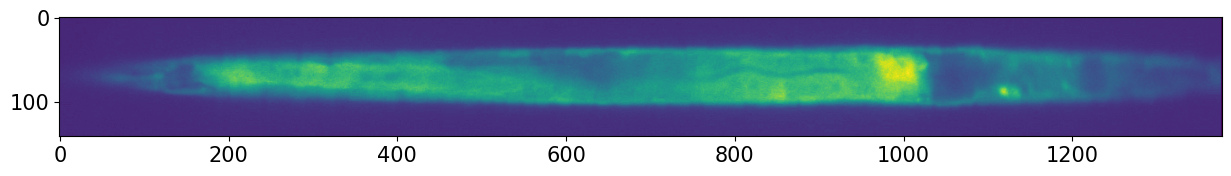

/mnt/external.data/TowbinLab/ngerber/20200317_wBT280_wBT281_LIPSI_daf16_GFP_20C/analysis/ch1_WBT281_focused_threshold_str/Time00182_Point0017_GFP_Seq12434.tiff
182


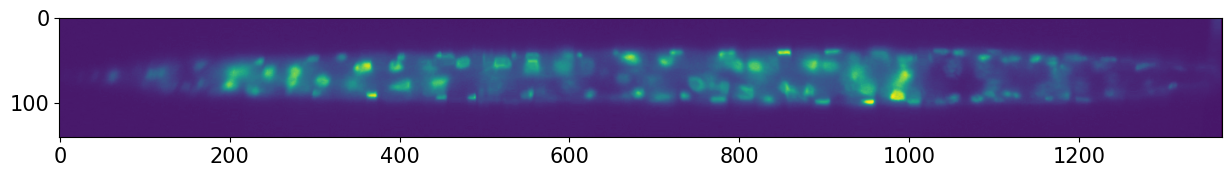

/mnt/external.data/TowbinLab/ngerber/20200317_wBT280_wBT281_LIPSI_daf16_GFP_20C/analysis/ch1_WBT281_focused_threshold_str/Time00189_Point0017_GFP_Seq12910.tiff
189


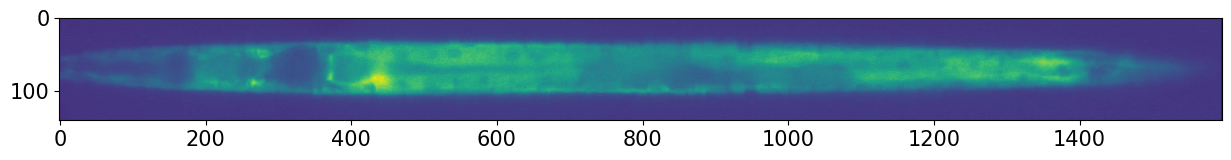

/mnt/external.data/TowbinLab/ngerber/20200317_wBT280_wBT281_LIPSI_daf16_GFP_20C/analysis/ch1_WBT281_focused_threshold_str/Time00200_Point0017_GFP_Seq13658.tiff
200


In [ ]:
def list_images_of_point(images, point):
    """
    Given a list of images and a point, returns a list of image names that contain the point in their file names.
    
    Parameters:
        images (list): List of image file names.
        point (str): Point to search for in image file names.
    
    Returns:
        list: List of image names that contain the point in their file names.
    """
    
    # Initialize empty list to store image names
    image_names = []
    
    # Iterate through list of images
    for image in images:
        # Check if point is in the image file name
        if point in os.path.basename(image):
            # If point is found, append image name to list
            image_names.append(image)
    
    # Return list of image names
    return image_names

gfp_dir = "/mnt/external.data/TowbinLab/ngerber/20200317_wBT280_wBT281_LIPSI_daf16_GFP_20C/analysis/ch1_WBT281_focused_threshold_str/"
images_gfp = sorted([os.path.join(gfp_dir, x) for x in os.listdir(gfp_dir)])
images_gfp = list_images_of_point(images_gfp, point)

clahe = cv2.createCLAHE(clipLimit=10, tileGridSize=(8,8))

peaks = [peaks_over_interval[1]-7, peaks_over_interval[1], peaks_over_interval[1]+11]

for peak in peaks:
    true_index_peak = interval_array[peak]
    img = images_gfp[true_index_peak]

    image = ti.imread(img)
    plt.imshow(image)
    plt.show()
    print(img)
    print(true_index_peak)